##Importing packages

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split # split data into two sets (train and test)
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import balanced_accuracy_score , roc_auc_score , make_scorer # ROC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import plot_confusion_matrix # the drawing of confusion matrix
from sklearn.metrics import accuracy_score # accuracy score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

## Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data_set/final_dataset_smes.csv') 
df.drop('Unnamed: 0',axis=1, inplace=True)
df
df["status"].value_counts()

0    13413
1     1632
Name: status, dtype: int64

#correlation matrix
####we will use the correlation matrix to determine the correlation between all variables

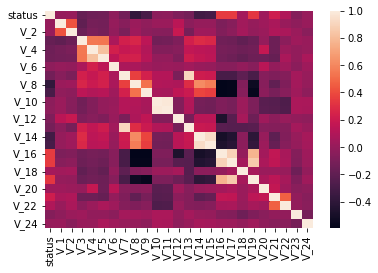

In [ ]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

#RandomForestClassifer
###We will use RandomForestClassifer to eliminate the least important feature.


 Splitting data into two (Train and Test)

In [ ]:
var_columns = [c for c in df.columns if c !='status']
X= df.loc[:, var_columns] # the variables that we're gonna use to build our model
y= df.loc[:, 'status'] # the result we wanna acheive

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #"test_size=0.2"=>the proportion of the dataset to include in the test split X/y_valid (test 20% train 80%)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12036, 24), (3009, 24), (12036,), (3009,))

Training the model using Sklearn "RandomForestClassifier" and "RandomForestRegressor" then Visualizing the feature importance

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

feature importances : 
 [0.04800558 0.03430198 0.23194862 0.0331243  0.03436835 0.04578459
 0.03834128 0.04414529 0.05329506 0.03444362 0.03363781 0.03606927
 0.06193018 0.02515526 0.02147252 0.00047317 0.00069353 0.00203832
 0.00539226 0.02717139 0.0562847  0.03381058 0.05602399 0.04208837]


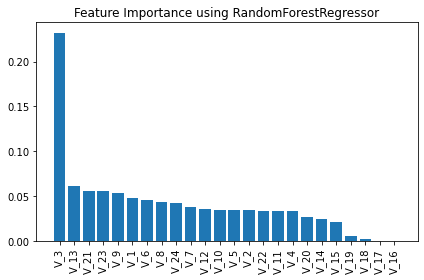

In [ ]:
print("feature importances : \n",rf.feature_importances_)
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance using RandomForestRegressor')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

feature importances : 
 [0.10426879 0.04236963 0.07203857 0.0372433  0.0364513  0.06147299
 0.04671977 0.06218546 0.05872994 0.03815642 0.03900599 0.04033885
 0.04834233 0.04830252 0.05348293 0.00201869 0.0077748  0.00179575
 0.00742786 0.0289972  0.04676342 0.03429548 0.04494384 0.03687417]


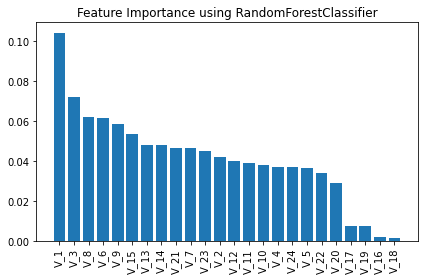

In [ ]:
print("feature importances : \n",rfc.feature_importances_)
importances = rfc.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance using RandomForestClassifier')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

##Removing unwanted features

In [ ]:
unwanted=['V_16','V_17','V_18','V_19','status']
var_columns = [c for c in df.columns if c not in unwanted]
X= df.loc[:, var_columns] # the variables that we're gonna use to build our model
y= df.loc[:, 'status'] # the result we wanna acheive

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #"test_size=0.2"=>the proportion of the dataset to include in the test split X/y_valid (test 20% train 80%)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12036, 20), (3009, 20), (12036,), (3009,))

##Appliying "StandardScaler" to the Train dataset

In [ ]:
Scaler = StandardScaler().fit(X_train)
print("the average value of each feature \n",Scaler.mean_)
print("the scale of each feature \n",Scaler.scale_)
X_train_scaled=Scaler.transform(X_train)

Scaler = StandardScaler().fit(X_test)
X_test_scaled=Scaler.transform(X_test)

the average value of each feature 
 [ 8.86108591e+00  1.23524593e+00  1.46672399e+00  1.54496344e+00
  1.19224493e+00  7.81797275e+00  2.32686092e+01  2.84712529e-02
 -6.10609837e-02  1.36754819e+00  1.33044865e+00  1.96414922e-01
  3.71168112e+01  6.24709206e-02  6.91467265e-02  1.04295115e+02
  7.62472582e+01  9.60262546e+01  3.35421685e+03  4.57245231e+03]
the scale of each feature 
 [1.92822864e+01 3.30840833e+00 8.08722150e-01 1.20682885e+00
 1.00701055e+00 2.36488473e+01 7.19698499e+01 1.48823812e-01
 7.80098723e-01 1.06131501e+00 1.05762946e+00 4.88431729e-01
 9.34646031e+01 1.96641398e-01 2.18588051e-01 3.46329430e+02
 1.15524258e+02 1.33406990e+02 7.39586527e+03 1.94147001e+03]


##Testing on different models
now after optimizing the dataset we are going to test and see if we have some improvement or not  

In [ ]:
pip install lightgbm #installing lightGBM

In [ ]:
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
import xgboost 

##LightGBM Model

In [ ]:
model_LGBM = lgb.LGBMClassifier() 
eval_set = [(X_test_scaled, y_test)]
model_LGBM.fit(X_train_scaled,
               y_train,
               early_stopping_rounds=10,
               eval_set=eval_set,
               verbose=True)

[1]	valid_0's binary_logloss: 0.325512
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.309751
[3]	valid_0's binary_logloss: 0.298017
[4]	valid_0's binary_logloss: 0.288979
[5]	valid_0's binary_logloss: 0.282003
[6]	valid_0's binary_logloss: 0.276338
[7]	valid_0's binary_logloss: 0.271373
[8]	valid_0's binary_logloss: 0.267276
[9]	valid_0's binary_logloss: 0.263004
[10]	valid_0's binary_logloss: 0.260023
[11]	valid_0's binary_logloss: 0.257773
[12]	valid_0's binary_logloss: 0.255532
[13]	valid_0's binary_logloss: 0.253545
[14]	valid_0's binary_logloss: 0.252005
[15]	valid_0's binary_logloss: 0.249812
[16]	valid_0's binary_logloss: 0.248838
[17]	valid_0's binary_logloss: 0.247611
[18]	valid_0's binary_logloss: 0.24645
[19]	valid_0's binary_logloss: 0.245847
[20]	valid_0's binary_logloss: 0.245224
[21]	valid_0's binary_logloss: 0.244708
[22]	valid_0's binary_logloss: 0.243967
[23]	valid_0's binary_logloss: 0.243669
[24]	valid_0's binary_loglos

LGBMClassifier()

In [ ]:
y_train_pred = model_LGBM.predict_proba(X_train_scaled)[:,1]
y_test_pred = model_LGBM.predict_proba(X_test_scaled)[:,1]
for i in range(0, X_test.shape[0]): 
    if y_test_pred[i]>=.5:       # setting threshold to .5 
       y_test_pred[i]=1 
    else: 
       y_test_pred[i]=0  

print('the accuracy of LightGBM after data processing is',accuracy_score(y_test_pred, y_test))    

the accuracy of LightGBM after data processing is 0.9096045197740112


##XGBoost Model

In [ ]:
model_xgboost = xgboost.XGBClassifier()
eval_set = [(X_test_scaled, y_test)]
model_xgboost.fit(X_train_scaled,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)


[0]	validation_0-error:0.087737
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.089398
[2]	validation_0-error:0.089398
[3]	validation_0-error:0.089398
[4]	validation_0-error:0.090728
[5]	validation_0-error:0.090728
[6]	validation_0-error:0.089731
[7]	validation_0-error:0.090395
[8]	validation_0-error:0.09106
[9]	validation_0-error:0.090728
[10]	validation_0-error:0.090395
Stopping. Best iteration:
[0]	validation_0-error:0.087737



XGBClassifier()

In [ ]:
y_train_pred = model_xgboost.predict_proba(X_train_scaled)[:,1]
y_test_pred = model_xgboost.predict_proba(X_test_scaled)[:,1]
for i in range(0, X_test.shape[0]): 
    if y_test_pred[i]>=.5:       # setting threshold to .5 
       y_test_pred[i]=1 
    else: 
       y_test_pred[i]=0  

print('the accuracy of XGBoost after data processing is',accuracy_score(y_test_pred, y_test)) 

the accuracy of XGBoost after data processing is 0.9122632103688934


##MLPClassifier 

In [ ]:
MLP = MLPClassifier(max_iter=500, activation='relu')
MLP.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(max_iter=500)

In [ ]:
pred = MLP.predict(X_test_scaled)
y_train_pred = MLP.predict_proba(X_train_scaled)[:,1]
y_test_pred = MLP.predict_proba(X_test_scaled)[:,1]
for i in range(0, X_test.shape[0]): 
    if y_test_pred[i]>=.5:       # setting threshold to .5 
       y_test_pred[i]=1 
    else: 
       y_test_pred[i]=0  

print('the accuracy of MLP after data processing is',accuracy_score(y_test_pred, y_test)) 

the accuracy of MLP after data processing is 0.901296111665005
